# Bike Sharing: Data Visualization Project
## by Maria Cambalova

## Introduction
In this project, the [data on rides made in a bike-sharing system](https://www.lyft.com/bikes/bay-wheels/system-data) is explored using various visualizations (univariate, bivariate and multivariate). The available data span over four years (2017-2020), but I'll use only data from years 2017 and 2018. One row or record is one bike ride. The data is anonymized.<br><br>
The data contains following features:
- __trip duration__ (`duration_sec`): total duration of one ride in seconds
- __start date and time__ (`start_time`): time and date when the ride started
- __end date and time__ (`end_time`): time and date when the ride ended
- __start station ID__ (`start_station_id`): start station identifier
- __start station name__ (`start_station_name`): name of the start station
- __start station latitude__ (`start_station_latitude`): the latitude coordinate of the start station
- __start station longitude__ (`start_station_longitude`): the longitude coordinate of the start station
- __end station ID__ (`end_station_id`): end station identifier
- __end station name__ (`end_station_name`): name of the start station
- __end station latitude__ (`end_station_latitude`): the latitude coordinate of the end station
- __end station longitude__ (`end_station_longitude`): the longitude coordinate of the end station
- __bike ID__ (`bike_id`): the bike identifier
- __user type__ (`user_type`): whether the user is a regular one, i.e. member ('Subscriber') or a casual one ('Customer')
- __Bike Share for All__ (`bike_share_for_all_trip`): whether the ride was within the [Bike Share for All](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all) program, not available for 2017 rides

## Preliminary Wrangling

I'll divide this section into two parts: 
- [Data Gathering](#data_gathering) - download the data and load it into a dataframe
- [Data Wrangling](#data_wrangling) - quickly explore the data, clean if necessary and prepare it for further exploratory visualizations    

But first, import all packages used in data wrangling and subsequent visualizations:

In [1]:
# NumPy and Pandas
import numpy as np
import pandas as pd

# Packages to gather and manipulate with files
import glob
import os
import requests
import zipfile

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sb

# Set matplotlib backend
%matplotlib inline

<a name='data_gathering'></a>
### Data Gathering

I'd like to analyze bike-sharing data from the years 2017 and 2018. While there is only one file for 2017, the 2018 data is stored in separate month files (there are 12 files containing bike-sharing data for the year 2018). Therefore, I'll download the data programmatically: 
1. construct the file names using year, month and string '-fordgobike-tripdata.csv.zip' common for all the files
2. construct the full files' urls
3. download and store the files in the folder called 'data'  

When creating the file names using months, the numbers have to be padded with a leading zero. This can be accomplished using numpy's [zfill](https://numpy.org/doc/stable/reference/generated/numpy.char.zfill.html) method, as shown here: [Adding leading zeros to strings in NumPy array](https://stackoverflow.com/questions/55376333/adding-leading-zeros-to-strings-in-numpy-array).

In [2]:
# Create folder data to store csv files if the folder does not exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# Create lists of years and months
years = ['2017', '2018']
months = months = np.char.zfill(np.arange(1, 13).astype(str), 2)

# Testing
# years = ['2017', '2018']
# months = months = np.char.zfill(np.arange(1, 2).astype(str), 2)

# Every file of interest ends with the following string - keep it in file_sfx
file_sfx = '-fordgobike-tripdata.csv.zip'

# The url address (without the file name)
url_pfx = 'https://s3.amazonaws.com/baywheels-data/'

# Loop over files - start with the year
for year in years:
    # There is only one file collecting all data in case of the year 2017
    if year == '2017':
        print('Downloading {}'.format(year + file_sfx))
        # Construct the full file name using year and file suffix
        file = year + file_sfx
        # Download the file and store it
        response = requests.get(url_pfx + file)
        with open(os.path.join(folder_name, file), mode = 'wb') as file:
            file.write(response.content)
    
    # Data for the year 2018 is in separate files according to months
    else:
        for month in months:
            print('Downloading {}'.format(year + month + file_sfx))
            # Construct the full file name using year, month and file suffix
            file = year + month + file_sfx
            # Download the file and store it
            response = requests.get(url_pfx + file)
            with open(os.path.join(folder_name, file), mode = 'wb') as file:
                file.write(response.content)

Next, unzip the compressed files after the data has been successfully downloaded using the [zipfile](https://docs.python.org/3/library/zipfile.html) module; see also [Unzipping files in Python](https://stackoverflow.com/questions/3451111/unzipping-files-in-python). Also, use the [glob](https://docs.python.org/3/library/glob.html) library to retrieve the names of zip files, as learnt in the Data Wrangling part of Data Analyst Nanodegree Program at Udacity.

In [4]:
# Loop over all downloaded files and extract csv files
for zip_file in glob.glob(folder_name + '/*.zip'):
    with zipfile.ZipFile(zip_file, mode = 'r') as file:
        file.extractall(folder_name)

Finally, load the data into a Pandas dataframe `bikes`:

In [5]:
# Create empty dataframe to store the data
bikes = pd.DataFrame()

# Loop over csv files and add them to the target dataframe one by one
for csv_file in glob.glob(folder_name + '/*.csv'):
    bikes_tmp = pd.read_csv(csv_file)
    bikes = pd.concat([bikes, bikes_tmp], ignore_index = True, axis = 0, sort = False)

<a name='data_wrangling'></a>
### Data Wrangling
Let's examine the bike-sharing data and decide which features would be interesting to look at:

In [6]:
# View the first few lines
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN


In [7]:
# View the last few lines
bikes.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
2383416,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
2383417,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
2383418,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
2383419,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No
2383420,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,No


There are 14 features - the meaning of each one is described in the introductory section. The full data contain information about bike-shares over the period of 2 years - it might get pretty big. Let's check it out:

In [8]:
# How big is the dataframe?
bikes.shape

(2383421, 14)

The `bikes` dataframe contains over two million records. Are there any duplicates?

In [9]:
# Check for duplicates
bikes[bikes.duplicated()].shape

(0, 14)

There aren't duplicates - no need to fix anything with respect to this.</br></br>
Examine data types:

In [10]:
# Print basic information - datatypes and null values
bikes.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 14 columns):
duration_sec               2383421 non-null int64
start_time                 2383421 non-null object
end_time                   2383421 non-null object
start_station_id           2371650 non-null float64
start_station_name         2371650 non-null object
start_station_latitude     2383421 non-null float64
start_station_longitude    2383421 non-null float64
end_station_id             2371650 non-null float64
end_station_name           2371650 non-null object
end_station_latitude       2383421 non-null float64
end_station_longitude      2383421 non-null float64
bike_id                    2383421 non-null int64
user_type                  2383421 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 200.0+ MB


Columns `start_time` and `end_time` are objects. However, I'd like to have information about year, month, day, day of a week, and hour of a day. These can be retrieved using Pandas Series' [Datetimelike properties](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties). Therefore, I'll convert those two variables into datetime data type, create the respective columns afterwards and convert to categorical variables when appropriate.  

In [11]:
# Convert start time and end time to datetime format
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [12]:
# Create additional columns - year, month, day, day of week (Monday, Tuesday, etc.), hour
bikes['year'] = bikes['start_time'].dt.year
bikes['month'] = bikes['start_time'].dt.month_name()
bikes['day'] = bikes['start_time'].dt.day
bikes['weekday'] = bikes['start_time'].dt.day_name()
bikes['hour'] = bikes['start_time'].dt.hour

In [13]:
# Convert month to categorical variable
level_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['month'] = bikes['month'].astype(ordered_cat)

In [14]:
# Convert weekday to categorical variable
level_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['weekday'] = bikes['weekday'].astype(ordered_cat)

The `user_type` column would be better as a categorical variable for the visualization purposes:

In [15]:
# View user type variable values and their occurrence
bikes['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

In [16]:
# Convert user type to categorical variable
level_order = ['Customer', 'Subscriber']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['user_type'] = bikes['user_type'].astype(ordered_cat)

Duration is in seconds - let's calculate duration in minutes since this unit is much more convenient when working with bike rides:

In [17]:
# Create new column with duration in minutes
bikes['duration_min'] = bikes['duration_sec'] / 60

The dataframe is quite big - remove columns that will not be used in further exploration: 

In [18]:
# Remove unnecessary columns
bikes = bikes.drop(['start_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 
                    'end_time', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 
                    'bike_id', 'bike_share_for_all_trip', 'duration_sec'], axis = 1)

Let's verify that the `bikes` dataframe contains desired columns, and variables are of the proper data types:

In [19]:
# Check the result - correct datatypes and removal of selected columns
bikes.dtypes

start_station_name      object
end_station_name        object
user_type             category
year                     int64
month                 category
day                      int64
weekday               category
hour                     int64
duration_min           float64
dtype: object

Finally, confirm the changes by viewing a couple of sample records:

In [20]:
# View 10 random records
bikes.sample(10)

,start_station_name,end_station_name,user_type,year,month,day,weekday,hour,duration_min
367921,Broadway at Battery St,Steuart St at Market St,Subscriber,2017,September,8,Friday,10,3.600000
2237877,Bancroft Way at Telegraph Ave,University Ave at Oxford St,Subscriber,2018,November,2,Friday,21,4.966667
2245884,Berry St at 4th St,Jackson Playground,Customer,2018,November,1,Thursday,18,27.900000
1541821,Berry St at 4th St,Townsend St at 7th St,Subscriber,2018,August,31,Friday,12,4.883333
1159723,Golden Gate Ave at Polk St,Beale St at Harrison St,Subscriber,2018,June,28,Thursday,11,13.950000
1550216,2nd St at Townsend St,San Francisco Ferry Building (Harry Bridges Pl...,Subscriber,2018,August,30,Thursday,8,7.016667
1296129,The Embarcadero at Sansome St,Steuart St at Market St,Subscriber,2018,June,7,Thursday,15,5.950000
475735,Union Square (Powell St at Post St),Powell St BART Station (Market St at 4th St),Customer,2017,July,30,Sunday,14,11.716667
774867,Dolores St at 15th St,Market St at 10th St,Subscriber,2018,March,18,Sunday,14,9.016667
721462,University Ave at Oxford St,Bancroft Way at Telegraph Ave,Customer,2018,March,31,Saturday,20,25.283333


## Univariate Exploration

### Trip duration
Trip duration is a continuous numeric variable, therefore histogram is an appropriate univariate visualization:

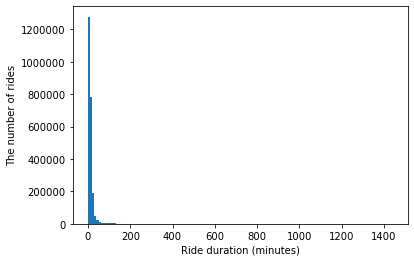

In [21]:
# Create 10 minutes intervals
bin_edges = np.arange(0, bikes['duration_min'].max()+10, 10)

# Create histogram
sb.distplot(bikes['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha': 1})
plt.xlabel('Ride duration (minutes)')
plt.ylabel('The number of rides');

It looks like the majority of rides is shorter than around 100 minutes, and that there are some rides also above 200 minutes, which is unfortunately not visible in the chart above. Let's check the number of these rides with duration above 200 minutes (12,000 seconds):

In [22]:
# The number of rides with long duration
bikes[bikes['duration_min'] > 200].shape[0]

11907

Distribution is strongly positively skewed - create a histogram under logarithmic scale:

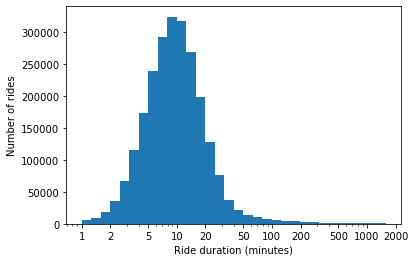

In [23]:
# Histogram with log scaled x-axis
bin_edges = 10 ** np.arange(0, np.log10(bikes['duration_min'].max())+0.1, 0.1)
sb.distplot(bikes['duration_min'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})

plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(tick_locs, tick_locs)

plt.xlabel('Ride duration (minutes)')
plt.ylabel('Number of rides');

Under the logarithmic scale, data follow unimodal distribution centered around 5-15 minutes that is still skewed to the right. The peak suggests that most of the rides were rather short.  

Let's visualize the long rides separately - create a subset dataframe first and check the number of records in it:

In [24]:
long_rides = bikes[bikes['duration_min'] > 200]
print('Number of rides with duration above 200 minutes: {}'.format(long_rides.shape[0]))

Number of rides with duration above 200 minutes: 11907


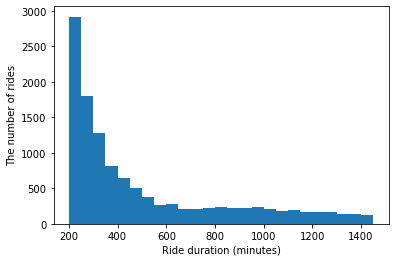

In [25]:
# Create 10 minutes intervals
bin_edges = np.arange(200, long_rides['duration_min'].max()+50, 50)

# Create histogram
sb.distplot(long_rides['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha': 1})
plt.xlabel('Ride duration (minutes)')
plt.ylabel('The number of rides');

The number of rides decreases until about 600 minutes (10 hours) duration is reached, then it stays at more or less constant level. The longest trips are probably because of a user couldn't return the bike after ride due to some reasons. Obviously, this information is not present in the data.  

When it comes to trip duration, following questions would be of interest:
- What time of year, month and day do the short and long trips occur? 
- When, in terms of week days and weekend, happen short and long trips?
- What is the trip duration relationship to the user type?

### Year, month, and day
Questions relevant to year, month, and day (of month) variables:
- What is the distribution of trips during year (month/season), and month (day of a month/start, middle, end of a month)?
- Are there more trips in summer months comparing to other seasons?
- Is the beginning of month better than the end in terms of bikes utilization?  

Year, month and day are categorical variables in nature, and the values should be logically ordered: from 2017 to 2018, from January to December, and from the first to the last day of month.

In [26]:
# Set the base color for all plots
base_color = sb.color_palette()[0]

In [27]:
# Define function to plot bar charts with absolute counts and relative proportions side by side
def bar_plot(data, x, x_label, y_tick_step = 0.10, rotation = 0):
    plt.figure(figsize = (16, 6))

    # Absolute counts
    plt.subplot(1, 2, 1)
    sb.countplot(data = data, x = x, color = base_color)
    plt.xlabel(x_label)
    plt.xticks(rotation = rotation)
    plt.ylabel('The number of rides')

    # Relative proportions
    max_year_count = data[x].value_counts().values[0]
    all_count = data.shape[0]
    max_proportion = max_year_count/all_count

    tick_props = np.arange(0, max_proportion + y_tick_step, y_tick_step)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    plt.subplot(1, 2, 2)
    sb.countplot(data = data, x = x, color = base_color)
    plt.xticks(rotation = rotation)
    plt.yticks(tick_props * all_count, tick_names)
    plt.xlabel(x_label)
    plt.ylabel('The proportion of rides');

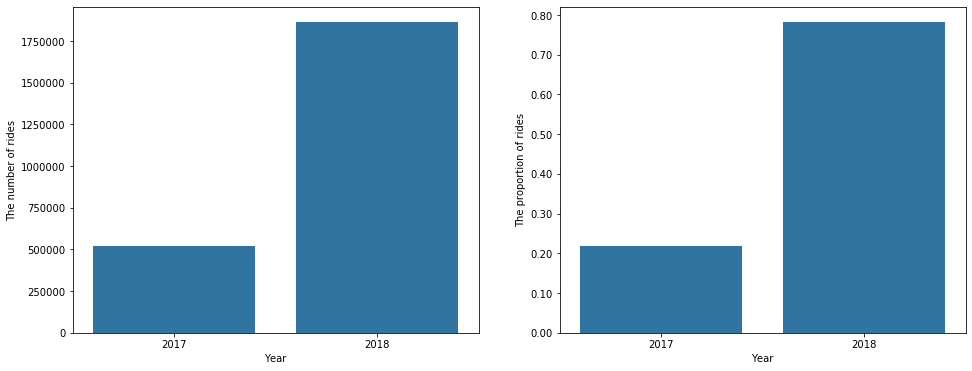

In [28]:
# Bar plots for year
bar_plot(bikes, 'year', 'Year')

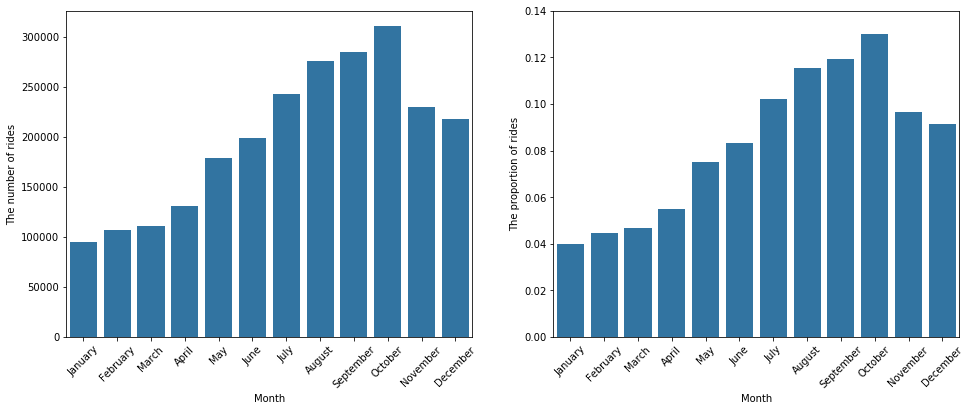

In [29]:
# Bar plots for months
bar_plot(bikes, 'month', 'Month', 0.02, 45)

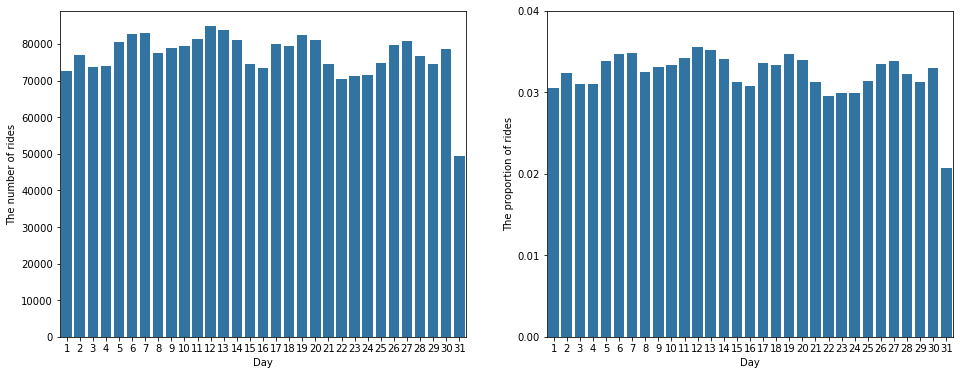

In [30]:
# Bar plots for day of month
bar_plot(bikes, 'day', 'Day', 0.01)

Let's summarize what can be observed from the above bar plots and formulate questions to be further explored:  
__Year__  
There is a significant increase of bike rides from 2017 to 2018 - there are around 500,000 rides in 2017, and more than 1,750,000 rides in 2018, which is ca. 1:4 ratio. In other words, the number of rides increased approximately four times from 2017 to 2018. Why is that? Is it possible that the bike sharing system started only later in 2017?  

__Month__  
The most trips were made in October followed by September and August. On the contrary, the least trips were made from January to April. Is there a relationship between month and year? Would there be the same pattern when looking at 2017 and 2018 individually?

__Day__  
There is quite regular distribution of trips among days. The only exception is the 31st day - but, not all months have 31 days, which could be the reason of the decreased number of rides.  

Let's rephrase the questions:
- Why is the number of rides in 2018 significantly higher than in 2017?
- In which months do the most rides occur when looking at the 2017 and 2018 data individually?

### Weekday or weekend?
Look at the ride distribution over days in a week - from Monday to Sunday:

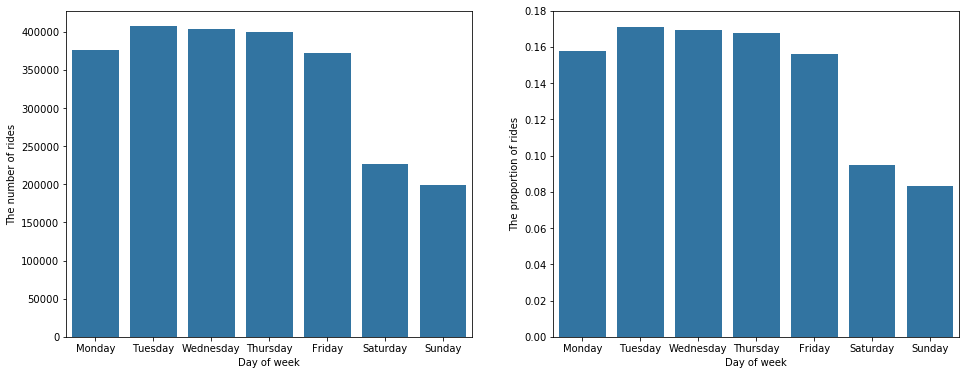

In [31]:
# Bar plots for day of week
bar_plot(bikes, 'weekday', 'Day of week', 0.02)

Weekdays (from Monday to Friday) have very similar number of rides. On the contrary, weekends (Saturday and Sunday) are weak. Following questions arise:
- What is the distribution of user types? Are the weekday users subscribers, because it might be more convenient to subscribe in case of regular usage? 
- On the other hand, are the weekend users casual customers?

### Hour of day
Let's find out when the majority of rides happens during a single day:

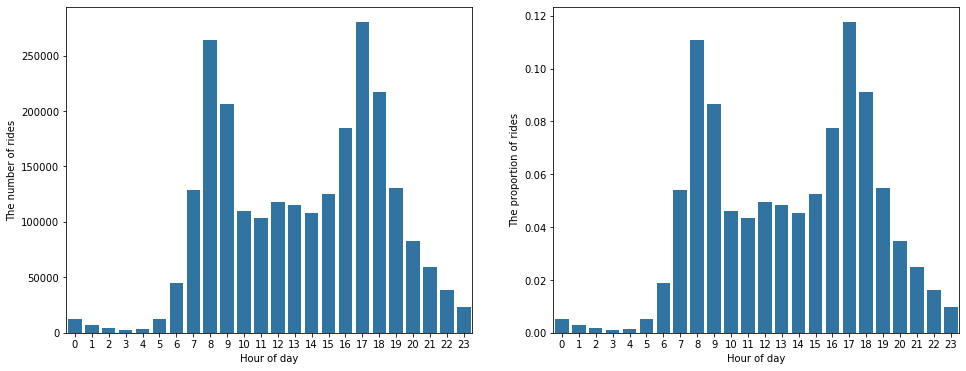

In [32]:
# Bar plots for hour of day
bar_plot(bikes, 'hour', 'Hour of day', 0.02)

The number of rides during a day follows bimodal distribution and there are two spikes - at around 8-9 in the morning and at 17-18 in the afternoon. These could correspond to times when people travel to work and from work, or school. There is a local minimum in between. The least number of rides happen at night and early in the morning, i.e. between 0 and 5. The distribution could differ for weekdays and weekends. I'll look deeper in the further exploration focusing on following:
- Does the weekend distribution of rides differ from the one observed on a regular day?
- Is the pattern same over all months?

### User type
There are two types of users - subscribers and casual users (customers). What is their ratio?

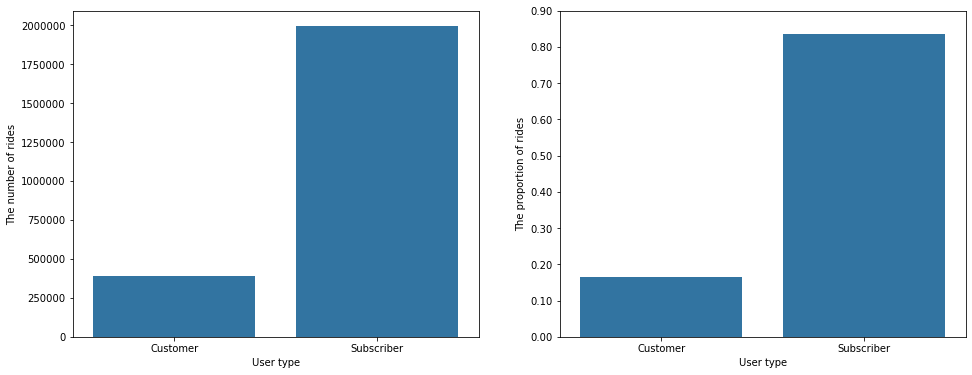

In [33]:
# Bar plots for user_type
bar_plot(bikes, 'user_type', 'User type', 0.1)

In [34]:
# Check the numbers
bikes['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

The vast majority of users are subscribers. It would be interesting to know when the two user types use the bike-sharing system the most - as already suggested above. I plan to focus on the following:
- What time of day do subscribers and casual customers utilize the bike sharing system the most?
- Which days of week are preferred by subscribers and which ones by customers?
- What is the users' trip distribution over the year (i.e. does it differ from month to month or not)?

## Bivariate Exploration

### Year vs. month

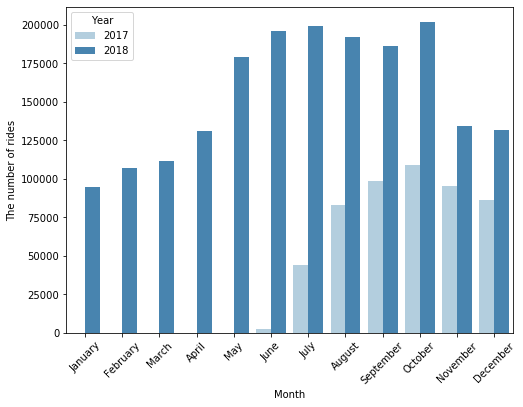

In [35]:
# Create clustered bar chart to show relationship year - month
plt.figure(figsize = (8, 6))
sb.countplot(data = bikes, x = 'month', hue = 'year', palette = 'Blues')
plt.legend(title = 'Year', loc = 'upper left')
plt.xlabel('Month')
plt.ylabel('The number of rides')
plt.xticks(rotation = 45);

Data for 2017 is not complete - Ford GoBike began operation only in June 2017 (see [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels)). Still, the number of users was increasing from June 2017 to October 2017, then it slightly dropped in November-December 2017. But then it increased again, and the number of users was higher in January 2018 when compared to December 2017.  
In 2018, the most rides occurred from May to October. This observation differs from the observation made on the basis of the univariate month bar chart above, where June and July had significantly less bike rides comparing to autumn months. The reason: missing 2017 data.  

### Month vs. day of month
Create a heatmap to show the number of rides distribution over months and days to see whether there are specific month days with elevated bike usage. Start with a common heatmap for both years:

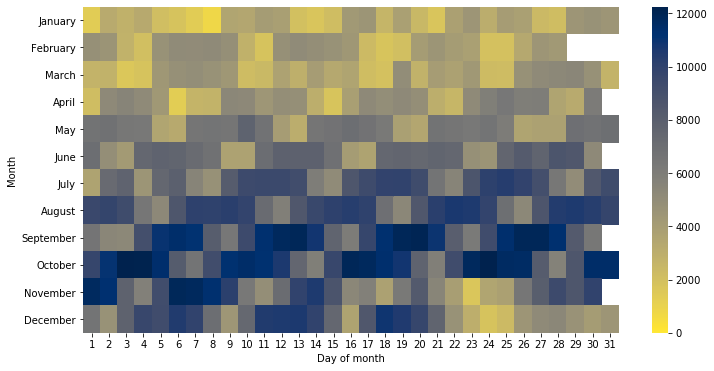

In [36]:
# Create proper data structure for a heatmap
ride_counts = bikes.groupby(['day', 'month']).size()
ride_counts = ride_counts.reset_index(name = 'count')
ride_counts = ride_counts.pivot(index = 'month', columns = 'day', values = 'count')

# Create a heatmap
plt.figure(figsize = (12, 6))
sb.heatmap(ride_counts, cmap = 'cividis_r', vmin = 0)
plt.xlabel('Day of month')
plt.ylabel('Month');

The days with the highest number of rides occur from September to November. However, this effect is most likely due to the fact that the bike sharing system started only in the second half of the year 2017. Therefore it's more appropriate to create separate heatmaps for 2017 and 2018.  

First step is to generate proper data structures - subsets - that can be visualized as heatmaps. The table for the 2017 data had to be adjusted to contain rows for missing months (January - June) to generate heatmaps with the same axes. A post on stackoverflow [Take multiple lists into dataframe](https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe) was helpful when creating dummy dataframe. I added one colorbar for both heatmaps with the help of code in another post [One horizontal colorbar for seaborn heatmaps subplots and Annot Issue with xticklabels](https://stackoverflow.com/questions/45122416/one-horizontal-colorbar-for-seaborn-heatmaps-subplots-and-annot-issue-with-xtick).

In [37]:
# Create proper data structures - one for 2017 and one for 2018 rides
# 2018
ride_counts_18 = bikes[bikes['year'] == 2018].groupby(['day', 'month']).size()
ride_counts_18 = ride_counts_18.reset_index(name = 'count')
ride_counts_18 = ride_counts_18.pivot(index = 'month', columns = 'day', values = 'count')

# 2017
ride_counts_17 = bikes[bikes['year'] == 2017].groupby(['day', 'month']).size()
ride_counts_17 = ride_counts_17.reset_index(name = 'count')

# 2017 data is not complete - add empty values for January to June to get same axes for both 2017 and 2018 heatmaps
months = ['January', 'February', 'March', 'April', 'May', 'June']
day = [1] * 6
count = np.NaN
add_counts = pd.DataFrame({'day': day, 'month': months, 'count': count})
ride_counts_17 = pd.concat([ride_counts_17, add_counts], ignore_index = True, axis = 0, sort = False)

# Convert month to categorical variable
level_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
ride_counts_17['month'] = ride_counts_17['month'].astype(ordered_cat)

ride_counts_17 = ride_counts_17.pivot(index = 'month', columns = 'day', values = 'count')

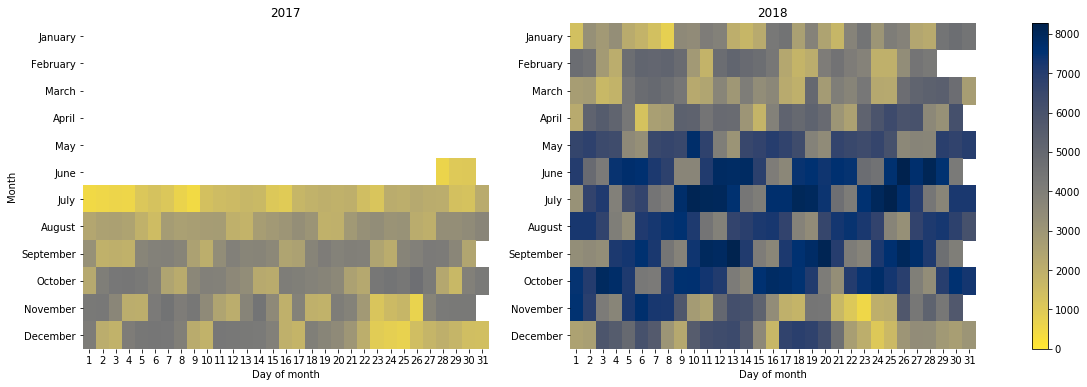

In [38]:
# Create heatmaps
plt.figure(figsize = (20, 6))
min_count = 0
max_count = ride_counts_18.max().max()

# Right
plt.subplot(1, 2, 2)
ax1 = sb.heatmap(ride_counts_18, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Day of month')
plt.ylabel('')
plt.title('2018')

# Left
plt.subplot(1, 2, 1)
ax2 = sb.heatmap(ride_counts_17, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Day of month')
plt.ylabel('Month')
plt.title('2017')

mappable = ax1.get_children()[0]
plt.colorbar(mappable, ax = [ax1, ax2], orientation = 'vertical');

In 2018, the highest number of rides happens from May to October. There is a pattern showing that 5 days in a row have more rides than the following 2 days - this observation is in alignment with the observation made on the basis of univariate distribution above. However, here it looks like it holds for every month. On the other hand, the distribution over the months is uniform - one cannot observe any significant differences between the months' starts and ends - the only exception is December, but this is probably because of winter and worse weather conditions.  
The observed '5-2' pattern can be observed also in 2017 data, and it starts soon after the start of the bike sharing system. Next, let's verify that those 5 days are really weekdays and the 2 days are Saturdays and Sundays.

### Month/year vs. day of week
First, create a heatmap showing the distribution of rides in months and weekdays for the 2017 and 2018 data:

In [53]:
# Create proper data structure
ride_counts = bikes.groupby(['weekday', 'month']).size()
ride_counts = ride_counts.reset_index(name = 'count')
ride_counts = ride_counts.pivot(index = 'month', columns = 'weekday', values = 'count')

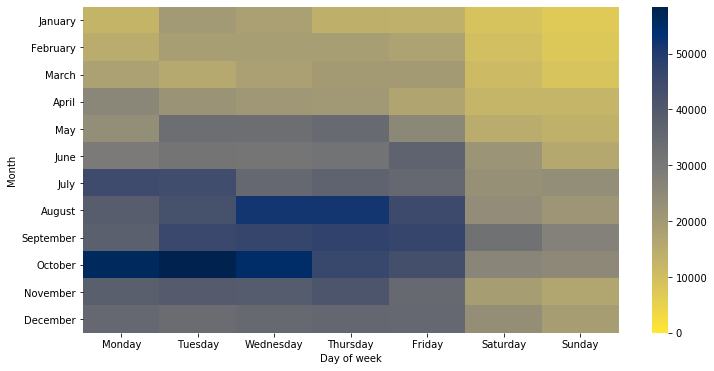

In [54]:
# Create a heatmap
plt.figure(figsize = (12, 6))
sb.heatmap(ride_counts, cmap = 'cividis_r', vmin = 0)
plt.xlabel('Day of week')
plt.ylabel('Month');

In every month, most of the rides happened from Monday to Friday, and the least number of rides within each month happened on Saturday and Sunday. However, there aren't so many individual days of week (Mondays, Tuesdays, etc.) in one month, and it might be better to create a bar chart showing the distribution of rides not aggregated by months. Let's create a clustered bar chart for both years showing the distribution of rides in days of a week:

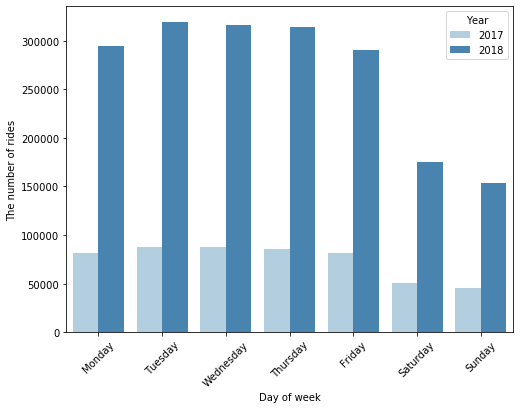

In [41]:
# Create clustered bar chart to show distribution of rides in the days of a week for the two years
plt.figure(figsize = (8, 6))
sb.countplot(data = bikes, x = 'weekday', hue = 'year', palette = 'Blues')
plt.legend(title = 'Year', loc = 'upper right')
plt.xlabel('Day of week')
plt.ylabel('The number of rides')
plt.xticks(rotation = 45);

Now it is clear that the most bike rides happened from Monday to Friday - for both years. 

### Day of a week vs. day time (hour of a day)
Explore what times of individual days (Mondays to Sundays) are characteristic by the highest number of rides - create a heatmap for this purpose:

In [55]:
# Create proper data structure
ride_counts = bikes.groupby(['weekday', 'hour']).size()
ride_counts = ride_counts.reset_index(name = 'count')
ride_counts = ride_counts.pivot(index = 'weekday', columns = 'hour', values = 'count')

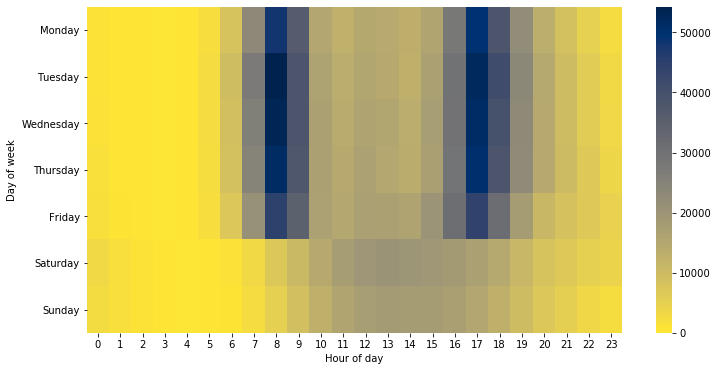

In [56]:
# Create a heatmap
plt.figure(figsize = (12, 6))
sb.heatmap(ride_counts, cmap = 'cividis_r', vmin = 0)
plt.xlabel('Hour of day')
plt.ylabel('Day of week');

There are two peaks from Monday to Friday - one in the morning (at about 7-9) and the other one in the afternoon (16-18). On the contrary, the ride distribution is unimodal during weekends. The most bike rides happen between 10-16 hour. 

In [42]:
# Create proper data structures
ride_counts_17 = bikes[bikes['year'] == 2017].groupby(['weekday', 'hour']).size()
ride_counts_17 = ride_counts_17.reset_index(name = 'count')
ride_counts_17 = ride_counts_17.pivot(index = 'weekday', columns = 'hour', values = 'count')

ride_counts_18 = bikes[bikes['year'] == 2018].groupby(['weekday', 'hour']).size()
ride_counts_18 = ride_counts_18.reset_index(name = 'count')
ride_counts_18 = ride_counts_18.pivot(index = 'weekday', columns = 'hour', values = 'count')

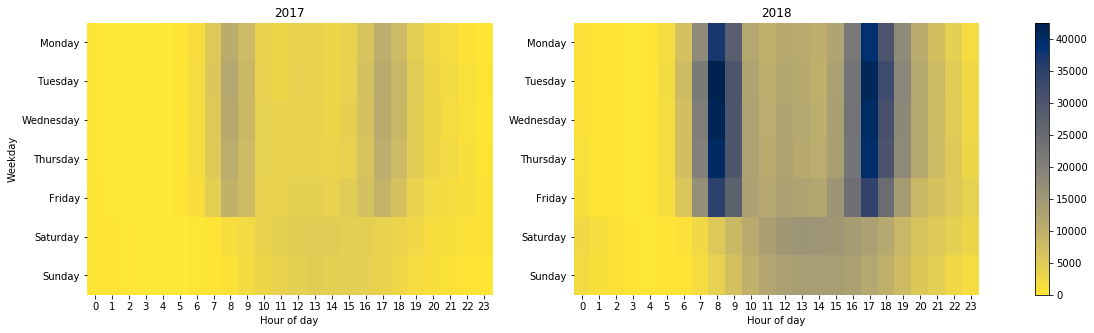

In [43]:
# Create heatmaps
plt.figure(figsize = (20, 5))
min_count = 0
max_count = ride_counts_18.max().max()

# Left
plt.subplot(1, 2, 1)
ax2 = sb.heatmap(ride_counts_17, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Hour of day')
plt.ylabel('Weekday')
plt.title('2017')

# Right
plt.subplot(1, 2, 2)
ax1 = sb.heatmap(ride_counts_18, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Hour of day')
plt.ylabel('')
plt.title('2018')

mappable = ax1.get_children()[0]
plt.colorbar(mappable, ax = [ax1, ax2], orientation = 'vertical');

For both years, the most rides happened at about 7-9 in the morning and 16-18 in the afternoon on normal weekdays (Monday - Friday). On the contrary, the highest number of rides for weekends was approximately between 9-17 during the day - it can be clearly observed for the year 2018. This pattern can be observed also for 2017, but it's not so clear because of the common color scale - let's use its own scale to see the pattern better: 

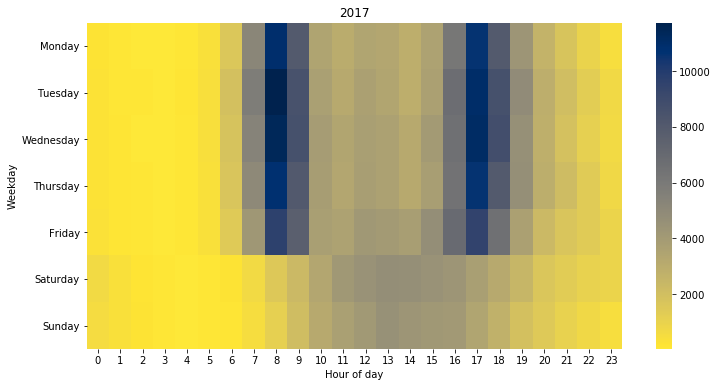

In [44]:
# Create a separate heatmap for the 2017 trips
plt.figure(figsize = (12, 6))
sb.heatmap(ride_counts_17, cmap = 'cividis_r')
plt.xlabel('Hour of day')
plt.ylabel('Weekday')
plt.title('2017');

### User type vs. day of a week
Since there are only two categories for the user type ('Subscriber', 'Customer'), create a clustered bar chart to show the relationship between these two categorical variables:

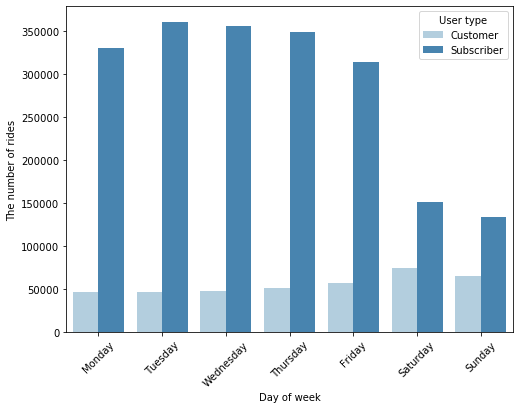

In [58]:
# Create clustered bar chart to show distribution of rides in the days of a week for the user types
plt.figure(figsize = (8, 6))

sb.countplot(data = bikes, x = 'weekday', hue = 'user_type', palette = 'Blues')
plt.legend(title = 'User type', loc = 'upper right')
plt.xlabel('Day of week')
plt.ylabel('The number of rides')
plt.xticks(rotation = 45);

Subscriber use the bike sharing system mostly on work days (from Monday to Friday). On the contrary, there are slightly more customer rides on weekends when compared to the rest of a week. The number of subscribers' rides is substantially higher from Monday to Friday, but during the weekends, the ratio of subscribers' to casual customers' rides decreases to about 2:1. 

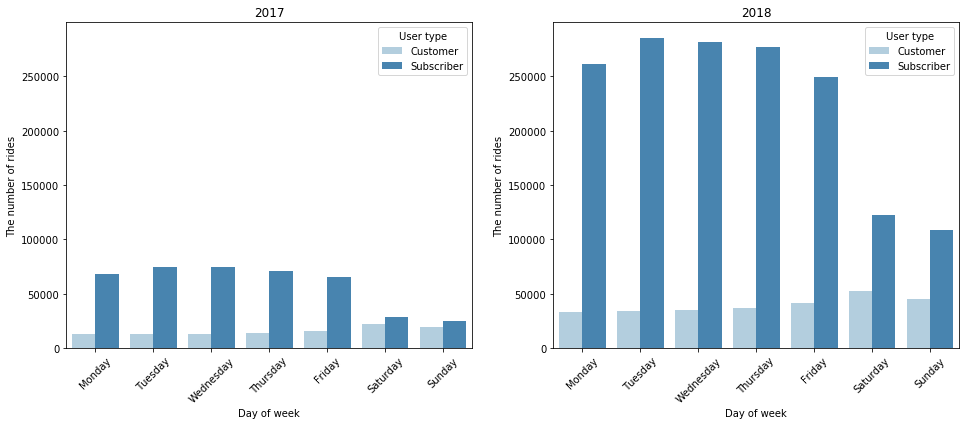

In [45]:
# Create clustered bar chart to show distribution of rides in the days of a week for the user types
plt.figure(figsize = (16, 6))

# Right - 2018 - create this one first to set the max value for y-axis
plt.subplot(1, 2, 2)
ax1 = sb.countplot(data = bikes[bikes['year'] == 2018], x = 'weekday', hue = 'user_type', palette = 'Blues')
plt.legend(title = 'User type', loc = 'upper right')
plt.title('2018')
plt.xlabel('Day of week')
plt.ylabel('The number of rides')
plt.xticks(rotation = 45)

# Left - 2017
plt.subplot(1, 2, 1)
sb.countplot(data = bikes[bikes['year'] == 2017], x = 'weekday', hue = 'user_type', palette = 'Blues')
plt.legend(title = 'User type', loc = 'upper right')
plt.title('2017')
plt.xlabel('Day of week')
plt.ylabel('The number of rides')
plt.xticks(rotation = 45)
plt.ylim(ax1.get_ylim());

There is a similar pattern in both 2017 and 2018 data:
- subscribers use bikes mostly during the work days (Mondays - Fridays)
- casual customers prefer weekends  

Also, the number of subscribers' rides drops dramatically from work days to weekends, while the number of casual customers doesn't increase so dramatically from work days to weekends. 

### User type vs. hour of a day
Create a heatmap showing a dsitribution of different user type rides during a day:

In [59]:
# Create proper data structures
ride_counts = bikes.groupby(['user_type', 'hour']).size()
ride_counts = ride_counts.reset_index(name = 'count')
ride_counts = ride_counts.pivot(index = 'user_type', columns = 'hour', values = 'count')

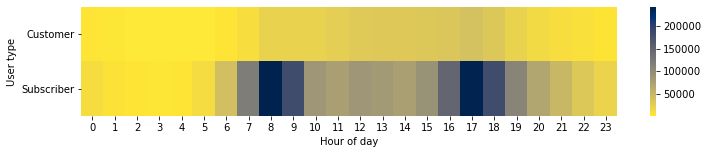

In [62]:
# Create heatmap
plt.figure(figsize = (12, 2))

sb.heatmap(ride_counts, cmap = 'cividis_r')
plt.xlabel('Hour of day')
plt.ylabel('User type')
plt.yticks(rotation = 0);

While the subscribers' rides happen mostly in the morning between 7-9 and then in the afternoon between 16-18 (bimodal distribution), the casual customers' rides follow roughly unimodal distribution and the most rides happen approximately in the range between 8 and 18 hour.

In [46]:
# Create proper data structures
ride_counts_17 = bikes[bikes['year'] == 2017].groupby(['user_type', 'hour']).size()
ride_counts_17 = ride_counts_17.reset_index(name = 'count')
ride_counts_17 = ride_counts_17.pivot(index = 'user_type', columns = 'hour', values = 'count')

ride_counts_18 = bikes[bikes['year'] == 2018].groupby(['user_type', 'hour']).size()
ride_counts_18 = ride_counts_18.reset_index(name = 'count')
ride_counts_18 = ride_counts_18.pivot(index = 'user_type', columns = 'hour', values = 'count')

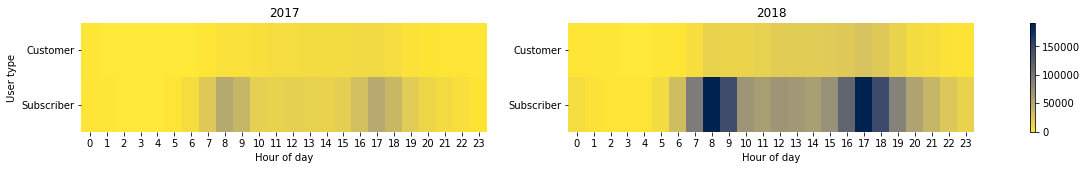

In [47]:
# Create heatmaps
plt.figure(figsize = (20, 2))
min_count = 0
max_count = ride_counts_18.max().max()

# Left
plt.subplot(1, 2, 1)
ax2 = sb.heatmap(ride_counts_17, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Hour of day')
plt.ylabel('User type')
plt.title('2017')
plt.yticks(rotation = 0)

# Right
plt.subplot(1, 2, 2)
ax1 = sb.heatmap(ride_counts_18, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Hour of day')
plt.ylabel('')
plt.title('2018')
plt.yticks(rotation = 0)

mappable = ax1.get_children()[0]
plt.colorbar(mappable, ax = [ax1, ax2], orientation = 'vertical');

The subscribers use bikes mostly during those two spikes - one in the morning and the second one in the afternoon. On the other hand, the customers' rides distribution doesn't follow this pattern and their bike usage is at the similar level during the day.

### Duration
Since duration is a numeric variable, violinplots, and boxplots are suitable visualization options. Because of the duration distribution, focus only on short trips up to 120 minutes. 

In [48]:
# Define function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [49]:
# Convert duration for plotting purposes
bikes['duration_log'] = log_trans(bikes['duration_min'])

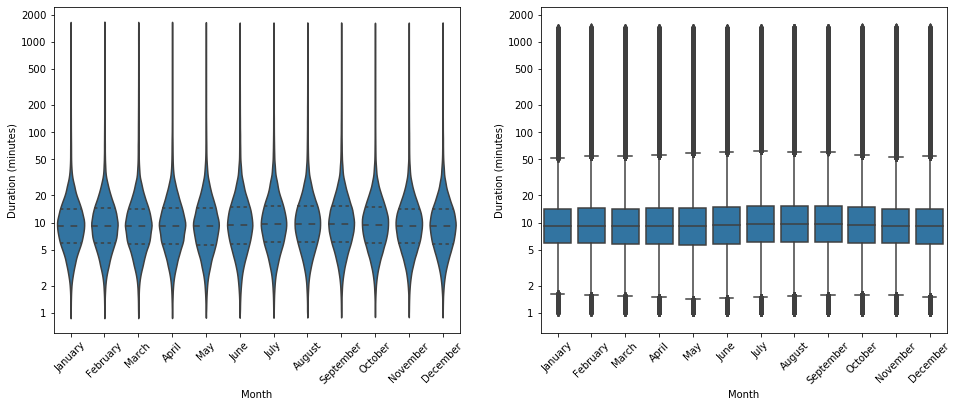

In [50]:
# Create violinplot and boxplot side by side - all data
plt.figure(figsize = (16, 6))

# Left - violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bikes, x = 'month', y = 'duration_log', color = base_color, inner = 'quartile')
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation = 45)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs)

# Right - boxplot
plt.subplot(1, 2, 2)
sb.boxplot(data = bikes, x = 'month', y = 'duration_log', color = base_color)
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation = 45)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.ylim(ax1.get_ylim());

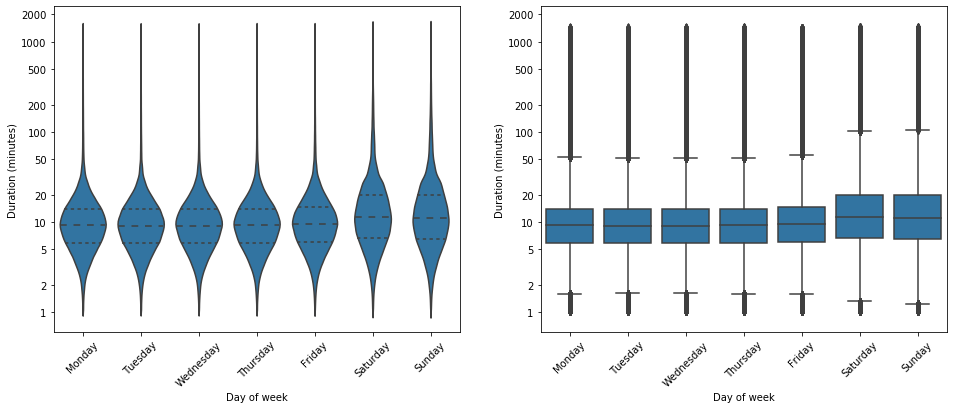

In [51]:
# Create violinplot and boxplot side by side - all data
plt.figure(figsize = (16, 6))

# Left - violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bikes, x = 'weekday', y = 'duration_log', color = base_color, inner = 'quartile')
plt.xlabel('Day of week')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation = 45)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs)

# Right - boxplot
plt.subplot(1, 2, 2)
sb.boxplot(data = bikes, x = 'weekday', y = 'duration_log', color = base_color)
plt.xlabel('Day of week')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation = 45)
plt.ylim(ax1.get_ylim())
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs);

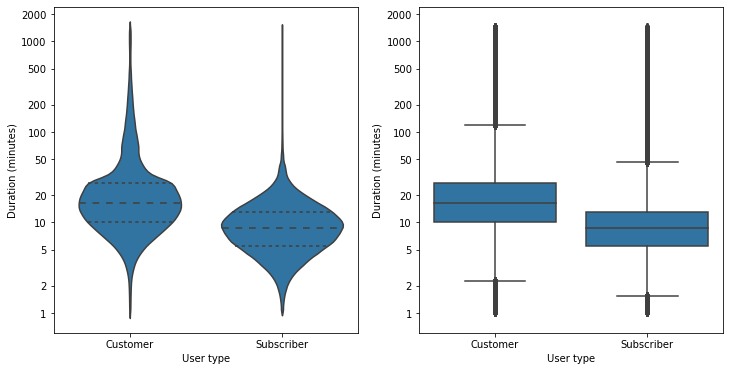

In [52]:
# Create violinplot and boxplot side by side - all data
plt.figure(figsize = (12, 6))

# Left - violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bikes, x = 'user_type', y = 'duration_log', color = base_color, inner = 'quartile')
plt.xlabel('User type')
plt.ylabel('Duration (minutes)')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs)

# Right - boxplot
plt.subplot(1, 2, 2)
sb.boxplot(data = bikes, x = 'user_type', y = 'duration_log', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration (minutes)')
plt.ylim(ax1.get_ylim())
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(log_trans(tick_locs), tick_locs);

Trip duration distribution is almost the same across months. Also the basic summaries in boxplots look very similar. On the contrary, there is a difference in the weekday and weekend distributions and statistics - weekend trips tend to be longer than weekday trips. When it comes to the user type, subscribers' trips are shorter than customers' trips. Both distributions are unimodal; although the customer trip distribution has a rather small mode between ca. 50 and 100 minutes.  
Next, it would be interesting to find out answers to following questions:
- Do the trip duration distributions vary from year to year?
- How do the trip duration distributions vary for day of week or month and user type?